In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import os

# Set plot style
sns.set(style="whitegrid")

In [3]:
# Load the main dataset
data_dir = os.path.join(os.getcwd(), 'data')
df = pd.read_csv(os.path.join(data_dir, 'BattlesStaging_01012021_WL_tagged.csv'))

# Load additional datasets
wincons_df = pd.read_csv(os.path.join(data_dir, 'Wincons.csv'))
clash_royal_data_df = pd.read_csv(os.path.join(data_dir, 'clash_royal_data.csv'))

# Display the first few rows of the main dataset
print(df.head())

# Display the columns of the main dataset
print(df.columns)

   Unnamed: 0                 battleTime    arena.id  gameMode.id  \
0           0  2020-12-31 21:02:12+00:00  54000050.0   72000006.0   
1           1  2020-12-31 21:02:15+00:00  54000050.0   72000006.0   
2           2  2020-12-31 21:02:45+00:00  54000050.0   72000006.0   
3           3  2020-12-31 21:03:13+00:00  54000050.0   72000006.0   
4           4  2020-12-31 21:03:17+00:00  54000050.0   72000006.0   

   average.startingTrophies  winner.tag  winner.startingTrophies  \
0                    5363.0   #PVLPJP2Y                   5372.0   
1                    5407.0  #8PRLRYYCV                   5409.0   
2                    5741.0   #2G8LQRCG                   5749.0   
3                    4307.0  #Y9QL09VGV                   4316.0   
4                    5776.5  #9RRYG9P9U                   5783.0   

   winner.trophyChange  winner.crowns  winner.kingTowerHitPoints  ...  \
0                 28.0            2.0                     4145.0  ...   
1                 29.0        

In [4]:
# Explain the columns of the main dataset
columns_description = {
    'battleTime': 'The time the battle started',
    'arena.id': 'The ID of the arena where the battle took place',
    'gameMode.id': 'The ID of the game mode',
    'average.startingTrophies': 'The average starting trophies of both players',
    'winner.tag': 'The tag of the winning player',
    'winner.startingTrophies': 'The starting trophies of the winning player',
    'winner.trophyChange': 'The change in trophies for the winning player',
    'winner.crowns': 'The number of crowns earned by the winning player',
    'winner.kingTowerHitPoints': 'The hit points of the winning player\'s king tower',
    'winner.princessTowersHitPoints': 'The hit points of the winning player\'s princess towers',
    'winner.clan.tag': 'The clan tag of the winning player',
    'winner.clan.badgeId': 'The clan badge ID of the winning player',
    'loser.tag': 'The tag of the losing player',
    'loser.startingTrophies': 'The starting trophies of the losing player',
    'loser.trophyChange': 'The change in trophies for the losing player',
    'loser.crowns': 'The number of crowns earned by the losing player',
    'loser.kingTowerHitPoints': 'The hit points of the losing player\'s king tower',
    'loser.princessTowersHitPoints': 'The hit points of the losing player\'s princess towers',
    'loser.clan.tag': 'The clan tag of the losing player',
    'loser.clan.badgeId': 'The clan badge ID of the losing player',
    'tournamentTag': 'The tag of the tournament (if applicable)',
    'winner.card1.id': 'The ID of the first card of the winning player',
    'winner.card1.level': 'The level of the first card of the winning player',
    'winner.card2.id': 'The ID of the second card of the winning player',
    'winner.card2.level': 'The level of the second card of the winning player',
    'winner.card3.id': 'The ID of the third card of the winning player',
    'winner.card3.level': 'The level of the third card of the winning player',
    'winner.card4.id': 'The ID of the fourth card of the winning player',
    'winner.card4.level': 'The level of the fourth card of the winning player',
    'winner.card5.id': 'The ID of the fifth card of the winning player',
    'winner.card5.level': 'The level of the fifth card of the winning player',
    'winner.card6.id': 'The ID of the sixth card of the winning player',
    'winner.card6.level': 'The level of the sixth card of the winning player',
    'winner.card7.id': 'The ID of the seventh card of the winning player',
    'winner.card7.level': 'The level of the seventh card of the winning player',
    'winner.card8.id': 'The ID of the eighth card of the winning player',
    'winner.card8.level': 'The level of the eighth card of the winning player',
    'winner.cards.list': 'The list of cards of the winning player',
    'winner.totalcard.level': 'The total level of the cards of the winning player',
    'winner.troop.count': 'The count of troop cards of the winning player',
    'winner.structure.count': 'The count of structure cards of the winning player',
    'winner.spell.count': 'The count of spell cards of the winning player',
    'winner.common.count': 'The count of common cards of the winning player',
    'winner.rare.count': 'The count of rare cards of the winning player',
    'winner.epic.count': 'The count of epic cards of the winning player',
    'winner.legendary.count': 'The count of legendary cards of the winning player',
    'winner.elixir.average': 'The average elixir cost of the winning player\'s deck',
    'loser.card1.id': 'The ID of the first card of the losing player',
    'loser.card1.level': 'The level of the first card of the losing player',
    'loser.card2.id': 'The ID of the second card of the losing player',
    'loser.card2.level': 'The level of the second card of the losing player',
    'loser.card3.id': 'The ID of the third card of the losing player',
    'loser.card3.level': 'The level of the third card of the losing player',
    'loser.card4.id': 'The ID of the fourth card of the losing player',
    'loser.card4.level': 'The level of the fourth card of the losing player',
    'loser.card5.id': 'The ID of the fifth card of the losing player',
    'loser.card5.level': 'The level of the fifth card of the losing player',
    'loser.card6.id': 'The ID of the sixth card of the losing player',
    'loser.card6.level': 'The level of the sixth card of the losing player',
    'loser.card7.id': 'The ID of the seventh card of the losing player',
    'loser.card7.level': 'The level of the seventh card of the losing player',
    'loser.card8.id': 'The ID of the eighth card of the losing player',
    'loser.card8.level': 'The level of the eighth card of the losing player',
    'loser.cards.list': 'The list of cards of the losing player',
    'loser.totalcard.level': 'The total level of the cards of the losing player',
    'loser.troop.count': 'The count of troop cards of the losing player',
    'loser.structure.count': 'The count of structure cards of the losing player',
    'loser.spell.count': 'The count of spell cards of the losing player',
    'loser.common.count': 'The count of common cards of the losing player',
    'loser.rare.count': 'The count of rare cards of the losing player',
    'loser.epic.count': 'The count of epic cards of the losing player',
    'loser.legendary.count': 'The count of legendary cards of the losing player',
    'loser.elixir.average': 'The average elixir cost of the losing player\'s deck'
}

# Print the description of important columns
for col, desc in columns_description.items():
    print(f"{col}: {desc}")

battleTime: The time the battle started
arena.id: The ID of the arena where the battle took place
gameMode.id: The ID of the game mode
average.startingTrophies: The average starting trophies of both players
winner.tag: The tag of the winning player
winner.startingTrophies: The starting trophies of the winning player
winner.trophyChange: The change in trophies for the winning player
winner.crowns: The number of crowns earned by the winning player
winner.kingTowerHitPoints: The hit points of the winning player's king tower
winner.princessTowersHitPoints: The hit points of the winning player's princess towers
winner.clan.tag: The clan tag of the winning player
winner.clan.badgeId: The clan badge ID of the winning player
loser.tag: The tag of the losing player
loser.startingTrophies: The starting trophies of the losing player
loser.trophyChange: The change in trophies for the losing player
loser.crowns: The number of crowns earned by the losing player
loser.kingTowerHitPoints: The hit poin

   Unnamed: 0                battleTime    arena.id  gameMode.id  \
0           0 2020-12-31 21:02:12+00:00  54000050.0   72000006.0   
1           1 2020-12-31 21:02:15+00:00  54000050.0   72000006.0   
2           2 2020-12-31 21:02:45+00:00  54000050.0   72000006.0   
3           3 2020-12-31 21:03:13+00:00  54000050.0   72000006.0   
4           4 2020-12-31 21:03:17+00:00  54000050.0   72000006.0   

   average.startingTrophies  winner.tag  winner.startingTrophies  \
0                    5363.0   #PVLPJP2Y                   5372.0   
1                    5407.0  #8PRLRYYCV                   5409.0   
2                    5741.0   #2G8LQRCG                   5749.0   
3                    4307.0  #Y9QL09VGV                   4316.0   
4                    5776.5  #9RRYG9P9U                   5783.0   

   winner.trophyChange  winner.crowns  winner.kingTowerHitPoints  ...  \
0                 28.0            2.0                     4145.0  ...   
1                 29.0            1.

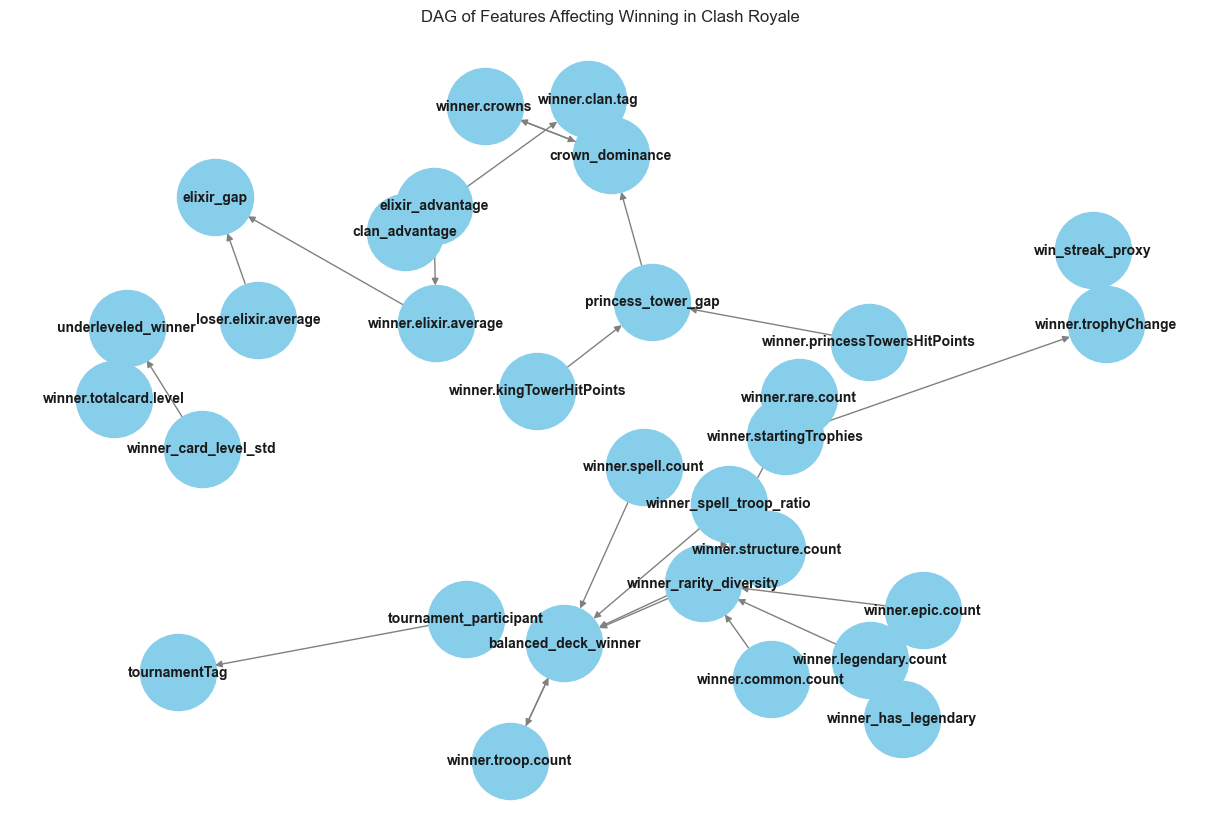

In [5]:
# Create a function to add features to the DataFrame
def add_features(df):
    df['battleTime'] = pd.to_datetime(df['battleTime'])
    numeric_cols = [
        'winner.princessTowersHitPoints',
        'loser.princessTowersHitPoints',
        'winner.startingTrophies',
        'loser.startingTrophies',
        'winner.trophyChange',
        'loser.trophyChange',
        'winner.elixir.average',
        'loser.elixir.average'
    ]
    
    for col in numeric_cols:
        df[col] = (
            df[col].astype(str)
            .str.replace(',', '.', regex=False)  # Handle European decimal formats
            .str.replace('[^0-9.]', '', regex=True)  # Remove non-numeric characters
            .replace('', np.nan)  # Convert empty strings to NaN
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df['deck_elixir_variability'] = df[['winner.elixir.average', 'loser.elixir.average']].std(axis=1)
    df['winner_trophy_eff'] = df['winner.trophyChange'] / df['winner.startingTrophies']
    df['loser_trophy_eff'] = df['loser.trophyChange'].abs() / df['loser.startingTrophies']
    winner_card_levels = [f'winner.card{i}.level' for i in range(1,9)]
    loser_card_levels = [f'loser.card{i}.level' for i in range(1,9)]
    df['winner_card_level_std'] = df[winner_card_levels].std(axis=1)
    df['loser_card_level_std'] = df[loser_card_levels].std(axis=1)
    df['winner_spell_troop_ratio'] = df['winner.spell.count'] / df['winner.troop.count']
    df['loser_spell_troop_ratio'] = df['loser.spell.count'] / df['loser.troop.count']
    df['elixir_gap'] = df['winner.elixir.average'] - df['loser.elixir.average']
    rarities = ['common', 'rare', 'epic', 'legendary']
    df['winner_rarity_diversity'] = df[[f'winner.{r}.count' for r in rarities]].gt(0).sum(axis=1)
    df['loser_rarity_diversity'] = df[[f'loser.{r}.count' for r in rarities]].gt(0).sum(axis=1)
    df['princess_tower_gap'] = df['winner.princessTowersHitPoints'] - df['loser.princessTowersHitPoints']
    df['win_streak_proxy'] = df['winner.trophyChange'] / 50
    df['winner_has_legendary'] = df['winner.legendary.count'].gt(0).astype(int)
    df['loser_has_legendary'] = df['loser.legendary.count'].gt(0).astype(int)
    df['clan_advantage'] = ((df['winner.clan.tag'].notna()) & (df['loser.clan.tag'].isna())).astype(int)
    df['elixir_advantage'] = df['winner.elixir.average'].gt(df['loser.elixir.average']).astype(int)
    df['balanced_deck_winner'] = ((df['winner.troop.count'] > 2) & (df['winner.spell.count'] > 1) & (df['winner.structure.count'] > 0)).astype(int)
    df['balanced_deck_loser'] = ((df['loser.troop.count'] > 2) & (df['loser.spell.count'] > 1) & (df['loser.structure.count'] > 0)).astype(int)
    arena_mean = df.groupby('arena.id')['winner.totalcard.level'].transform('mean')
    df['underleveled_winner'] = (df['winner.totalcard.level'] < arena_mean).astype(int)
    arena_mean_loser = df.groupby('arena.id')['loser.totalcard.level'].transform('mean')
    df['underleveled_loser'] = (df['loser.totalcard.level'] < arena_mean_loser).astype(int)
    df['crown_dominance'] = df['winner.crowns'].ge(2).astype(int)
    df['tournament_participant'] = df['tournamentTag'].notna().astype(int)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    return df

# Apply the add_features function to the DataFrame
df = add_features(df)

# Display the first few rows of the modified DataFrame
print(df.head())

# Create a DAG to find correlations between features and winning
G = nx.DiGraph()

# Add nodes
features = [
    'winner.startingTrophies', 'winner.trophyChange', 'winner.crowns',
    'winner.kingTowerHitPoints', 'winner.princessTowersHitPoints',
    'winner.totalcard.level', 'winner.troop.count', 'winner.structure.count',
    'winner.spell.count', 'winner.common.count', 'winner.rare.count',
    'winner.epic.count', 'winner.legendary.count', 'winner.elixir.average',
    'elixir_gap', 'winner_card_level_std', 'winner_spell_troop_ratio',
    'winner_rarity_diversity', 'princess_tower_gap', 'win_streak_proxy',
    'winner_has_legendary', 'clan_advantage', 'elixir_advantage',
    'balanced_deck_winner', 'underleveled_winner', 'crown_dominance',
    'tournament_participant'
]

for feature in features:
    G.add_node(feature)

# Add edges based on assumed relationships
edges = [
    ('winner.startingTrophies', 'winner.trophyChange'),
    ('winner.trophyChange', 'win_streak_proxy'),
    ('winner.crowns', 'crown_dominance'),
    ('winner.kingTowerHitPoints', 'princess_tower_gap'),
    ('winner.princessTowersHitPoints', 'princess_tower_gap'),
    ('winner.totalcard.level', 'underleveled_winner'),
    ('winner.troop.count', 'balanced_deck_winner'),
    ('winner.structure.count', 'balanced_deck_winner'),
    ('winner.spell.count', 'balanced_deck_winner'),
    ('winner.common.count', 'winner_rarity_diversity'),
    ('winner.rare.count', 'winner_rarity_diversity'),
    ('winner.epic.count', 'winner_rarity_diversity'),
    ('winner.legendary.count', 'winner_rarity_diversity'),
    ('winner.elixir.average', 'elixir_gap'),
    ('loser.elixir.average', 'elixir_gap'),
    ('winner_card_level_std', 'underleveled_winner'),
    ('winner_spell_troop_ratio', 'balanced_deck_winner'),
    ('winner_rarity_diversity', 'balanced_deck_winner'),
    ('princess_tower_gap', 'crown_dominance'),
    ('win_streak_proxy', 'winner.trophyChange'),
    ('winner_has_legendary', 'winner.legendary.count'),
    ('clan_advantage', 'winner.clan.tag'),
    ('elixir_advantage', 'winner.elixir.average'),
    ('balanced_deck_winner', 'winner.troop.count'),
    ('underleveled_winner', 'winner.totalcard.level'),
    ('crown_dominance', 'winner.crowns'),
    ('tournament_participant', 'tournamentTag')
]

G.add_edges_from(edges)

# Draw the DAG
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("DAG of Features Affecting Winning in Clash Royale")
plt.show()

In [6]:
# Group by winner.tag and loser.tag
grouped_winner = df.groupby('winner.tag').size().reset_index(name='games_won')
grouped_loser = df.groupby('loser.tag').size().reset_index(name='games_lost')

# Sort the groups by the number of games won/lost
grouped_winner = grouped_winner.sort_values(by='games_won', ascending=False)
grouped_loser = grouped_loser.sort_values(by='games_lost', ascending=False)

# Print the 10 biggest tables for winners
print("Top 10 Winners:")
print(grouped_winner.head(10))

# Print the 10 biggest tables for losers
print("Top 10 Losers:")
print(grouped_loser.head(10))

Top 10 Winners:
         winner.tag  games_won
223306   #2RUL98URQ        133
280645   #2YU8PC89R        114
498037   #8VVQJUJPV        113
410048   #8LJCCUL22        111
188836   #2Q29LP2V0        109
1132433   #Q2LCCPG9        103
341034   #898QLJUPG        102
1272715   #U0L9PL8Q        100
411682   #8LLQVC0VC         97
629455     #9LUGUQY         96
Top 10 Losers:
          loser.tag  games_lost
218525   #2RUL98URQ         137
274835   #2YU8PC89R         116
1145705   #Q2LCCPG9         115
1345255   #V2QJR08Y         102
402278   #8LJCCUL22         101
489388   #8VVQJUJPV          99
184561   #2Q29LP2V0          97
619855     #9LUGUQY          97
333964   #898QLJUPG          97
204644    #2R29GVRP          97


In [8]:
# Group by winner.tag and loser.tag
grouped_winner = df.groupby('winner.tag').size().reset_index(name='games_won')
grouped_loser = df.groupby('loser.tag').size().reset_index(name='games_lost')

# Sort the groups by the number of games won/lost
grouped_winner = grouped_winner.sort_values(by='games_won', ascending=False)
grouped_loser = grouped_loser.sort_values(by='games_lost', ascending=False)

# Get the top 3 winners and losers
top_3_winners = grouped_winner.head(3)['winner.tag'].tolist()
top_3_losers = grouped_loser.head(3)['loser.tag'].tolist()

print("Top 3 Winners:", top_3_winners)
print("Top 3 Losers:", top_3_losers)

Top 3 Winners: ['#2RUL98URQ', '#2YU8PC89R', '#8VVQJUJPV']
Top 3 Losers: ['#2RUL98URQ', '#2YU8PC89R', '#Q2LCCPG9']


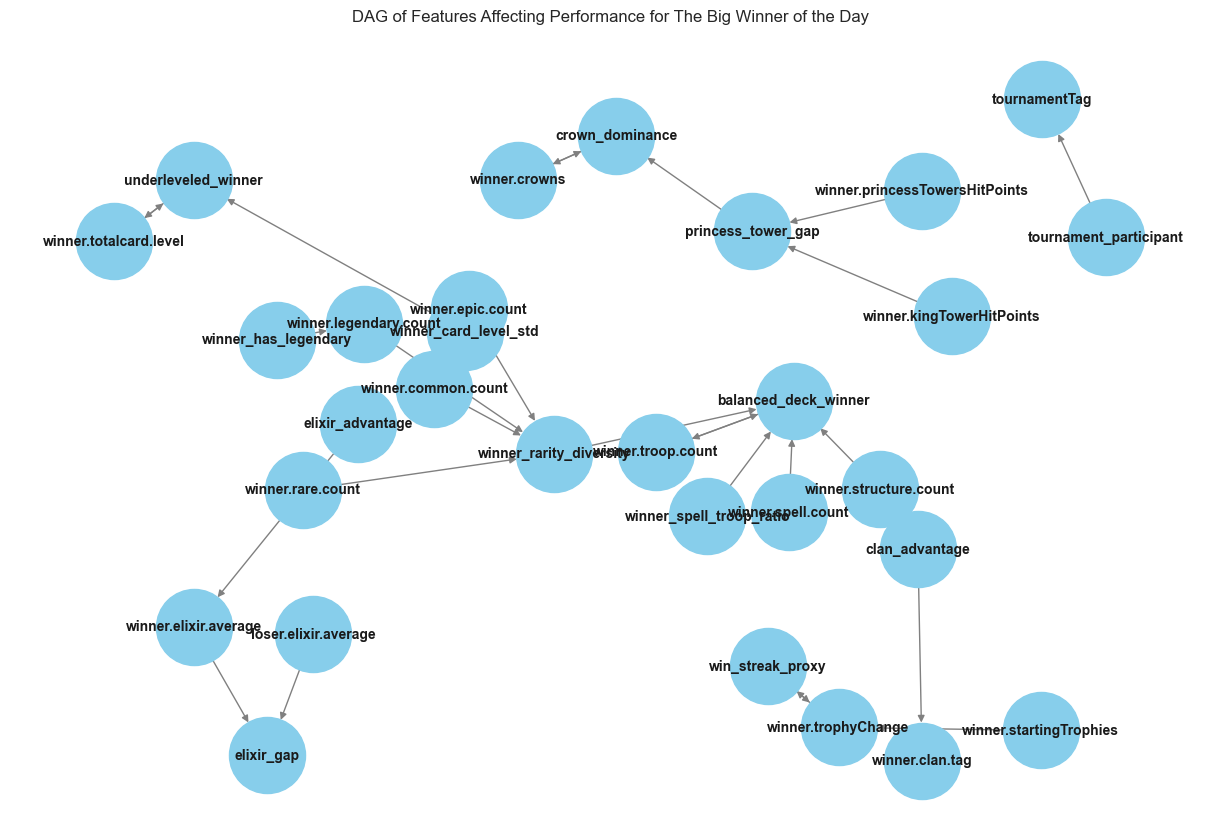

In [12]:
# Filter the DataFrame for the Big Winner of the Day
big_winner = top_3_winners[0]
big_winner_games = df[df['winner.tag'] == big_winner]

# Create a DAG for the Big Winner of the Day
G_big_winner = nx.DiGraph()

# Add nodes
for feature in features:
    G_big_winner.add_node(feature)

# Add edges based on assumed relationships
G_big_winner.add_edges_from(edges)

# Draw the DAG
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_big_winner, k=0.5)
nx.draw(G_big_winner, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("DAG of Features Affecting Performance for The Big Winner of the Day")
plt.show()

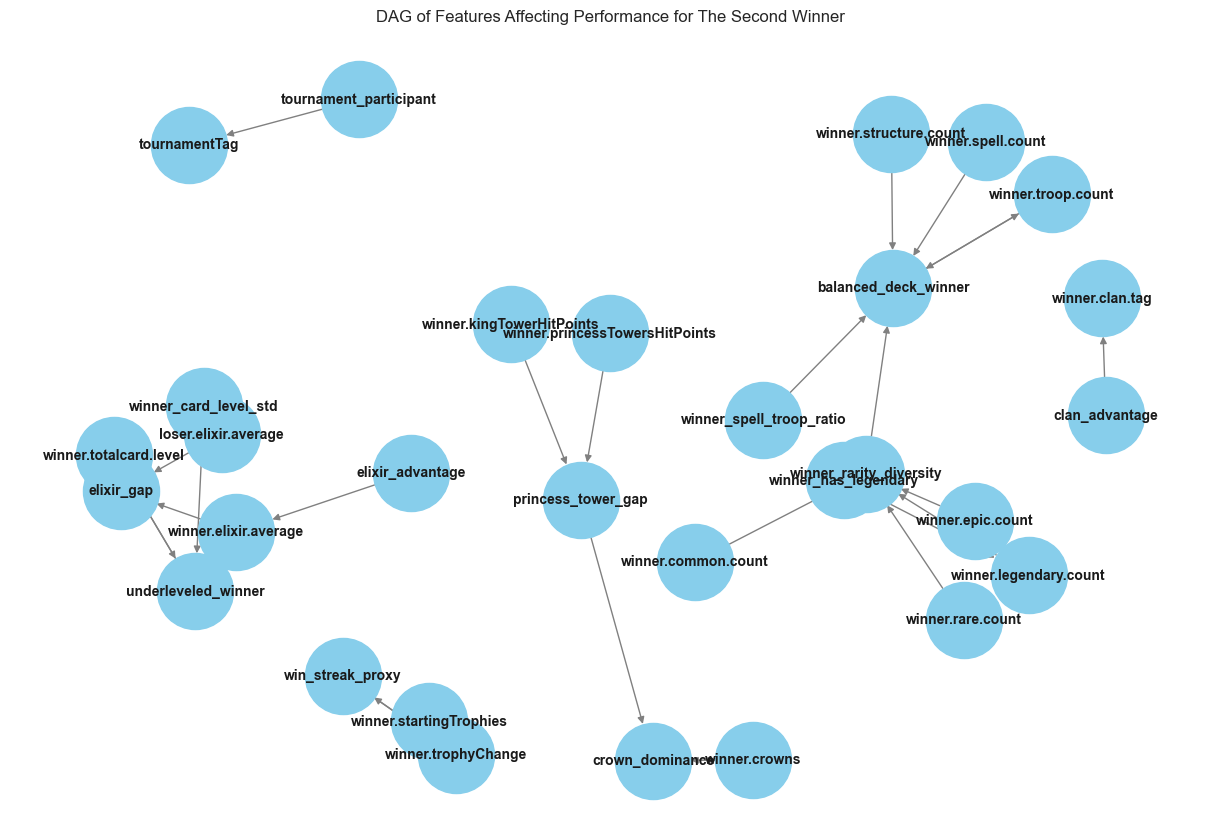

In [13]:
# Filter the DataFrame for the Second Winner
second_winner = top_3_winners[1]
second_winner_games = df[df['winner.tag'] == second_winner]

# Create a DAG for the Second Winner
G_second_winner = nx.DiGraph()

# Add nodes
for feature in features:
    G_second_winner.add_node(feature)

# Add edges based on assumed relationships
G_second_winner.add_edges_from(edges)

# Draw the DAG
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_second_winner, k=0.5)
nx.draw(G_second_winner, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("DAG of Features Affecting Performance for The Second Winner")
plt.show()

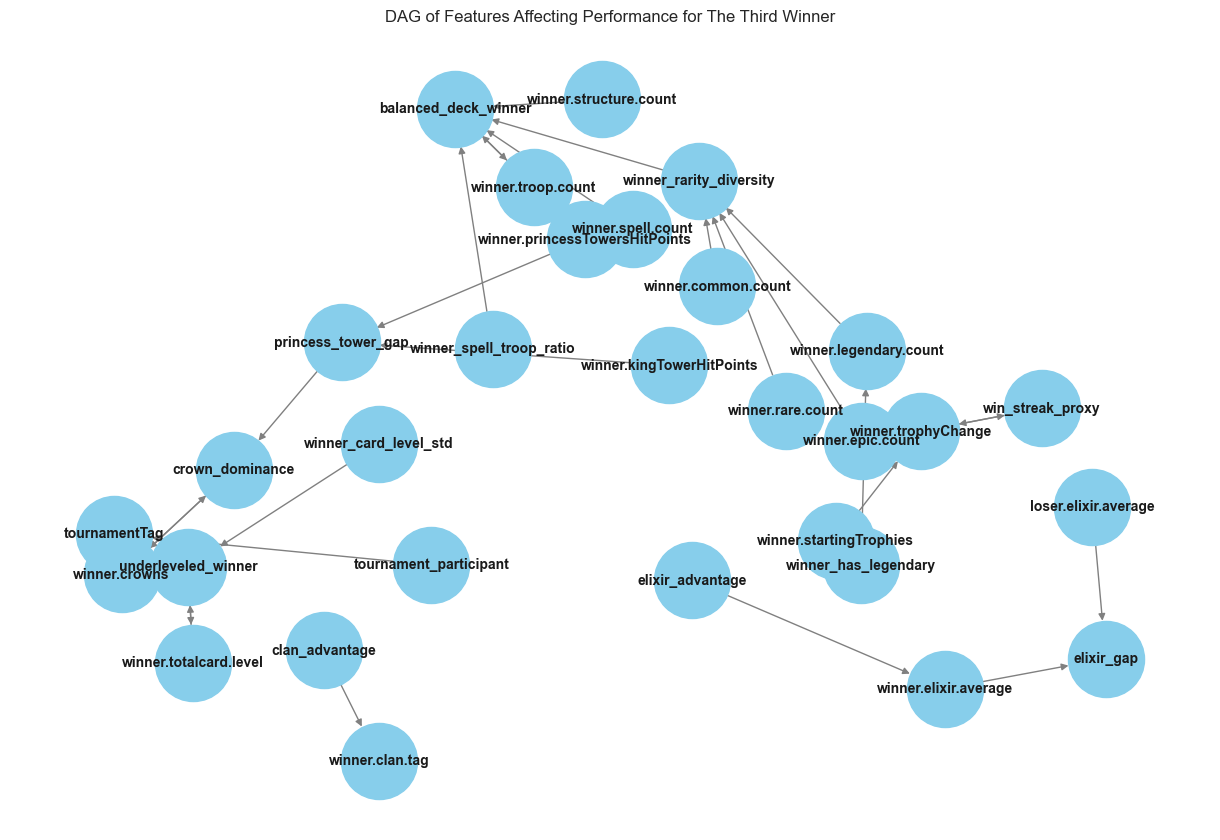

In [14]:
# Filter the DataFrame for the Third Winner
third_winner = top_3_winners[2]
third_winner_games = df[df['winner.tag'] == third_winner]

# Create a DAG for the Third Winner
G_third_winner = nx.DiGraph()

# Add nodes
for feature in features:
    G_third_winner.add_node(feature)

# Add edges based on assumed relationships
G_third_winner.add_edges_from(edges)

# Draw the DAG
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_third_winner, k=0.5)
nx.draw(G_third_winner, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("DAG of Features Affecting Performance for The Third Winner")
plt.show()

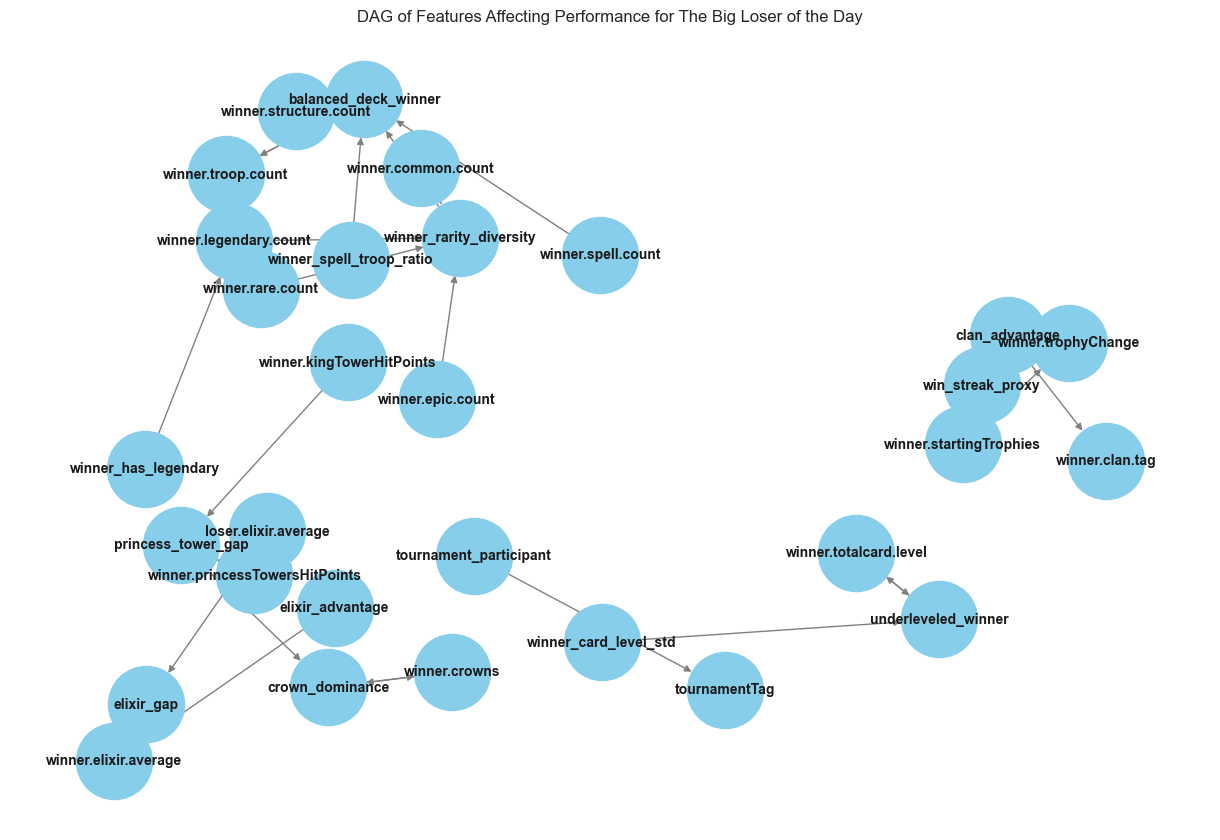

In [15]:
# Filter the DataFrame for the Big Loser of the Day
big_loser = top_3_losers[0]
big_loser_games = df[df['loser.tag'] == big_loser]

# Create a DAG for the Big Loser of the Day
G_big_loser = nx.DiGraph()

# Add nodes
for feature in features:
    G_big_loser.add_node(feature)

# Add edges based on assumed relationships
G_big_loser.add_edges_from(edges)

# Draw the DAG
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_big_loser, k=0.5)
nx.draw(G_big_loser, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("DAG of Features Affecting Performance for The Big Loser of the Day")
plt.show()

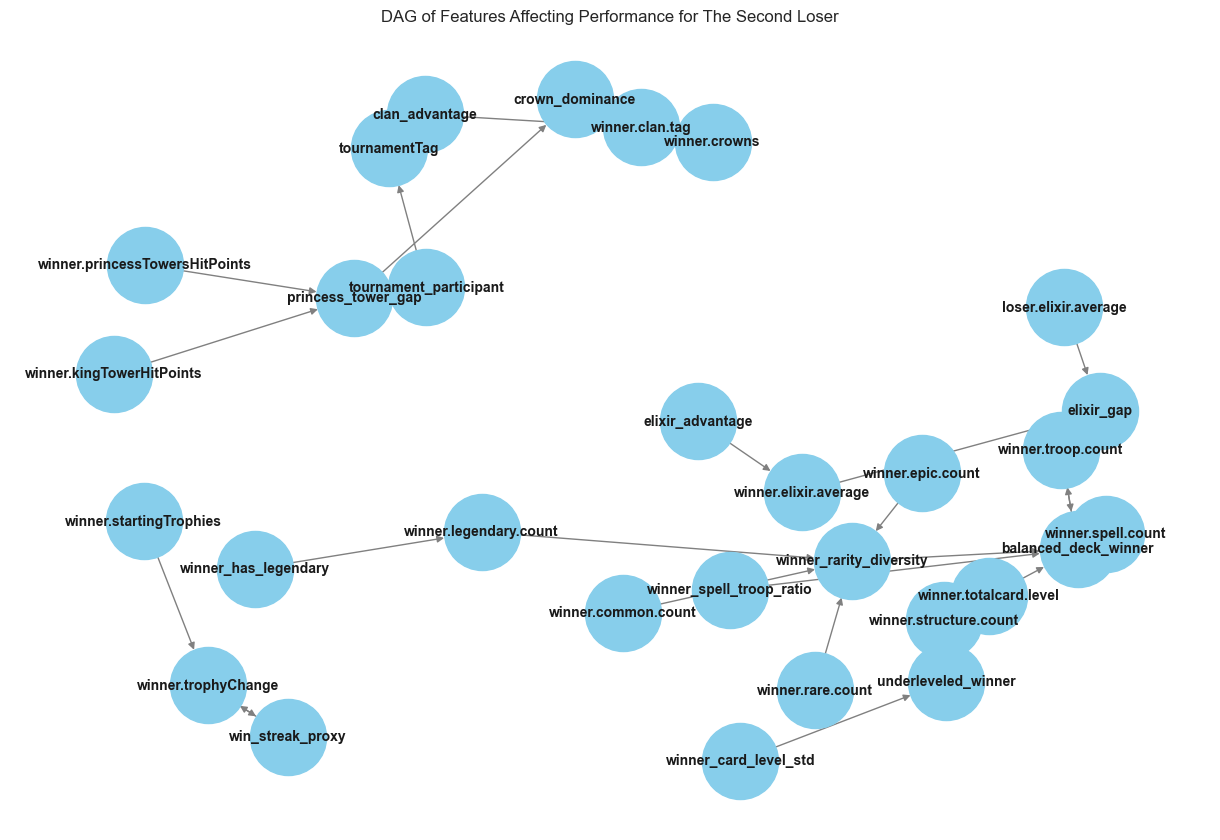

In [16]:
# Filter the DataFrame for the Second Loser
second_loser = top_3_losers[1]
second_loser_games = df[df['loser.tag'] == second_loser]

# Create a DAG for the Second Loser
G_second_loser = nx.DiGraph()

# Add nodes
for feature in features:
    G_second_loser.add_node(feature)

# Add edges based on assumed relationships
G_second_loser.add_edges_from(edges)

# Draw the DAG
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_second_loser, k=0.5)
nx.draw(G_second_loser, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("DAG of Features Affecting Performance for The Second Loser")
plt.show()

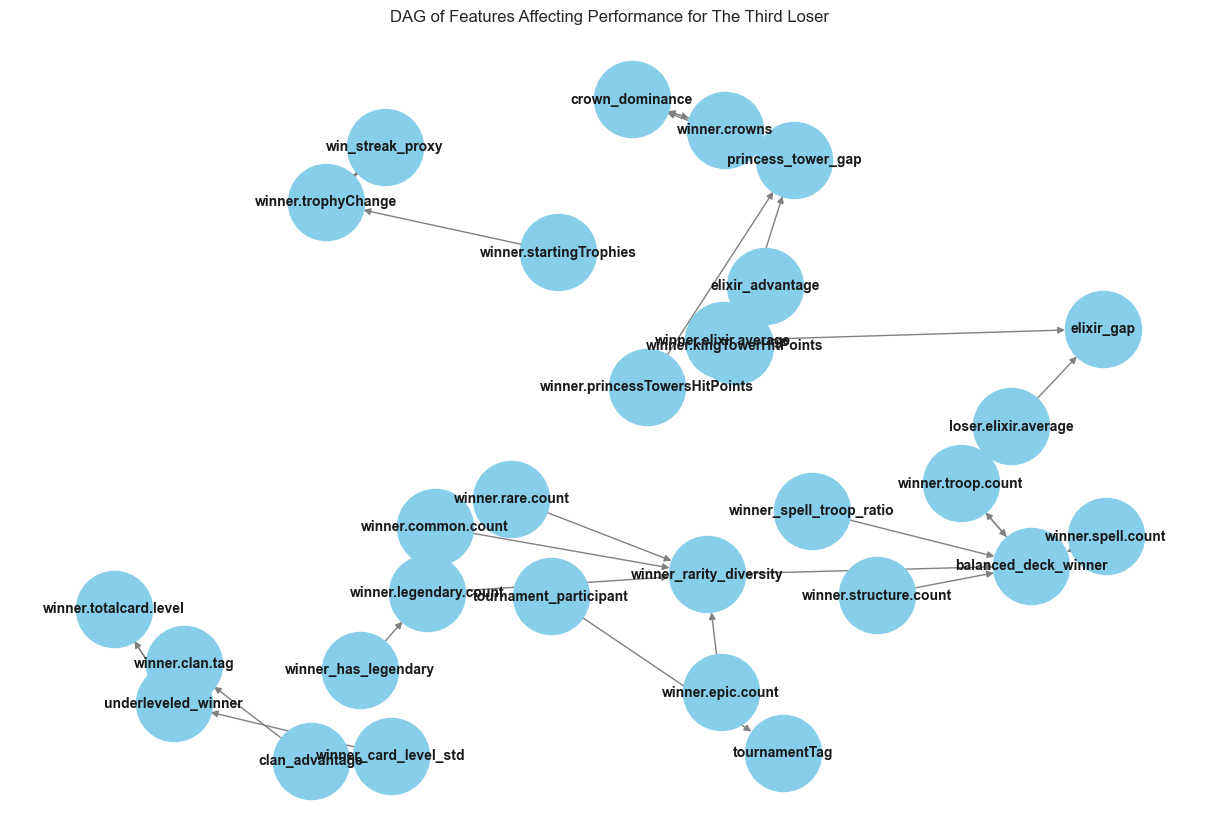

In [17]:
# Filter the DataFrame for the Third Loser
third_loser = top_3_losers[2]
third_loser_games = df[df['loser.tag'] == third_loser]

# Create a DAG for the Third Loser
G_third_loser = nx.DiGraph()

# Add nodes
for feature in features:
    G_third_loser.add_node(feature)

# Add edges based on assumed relationships
G_third_loser.add_edges_from(edges)

# Draw the DAG
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_third_loser, k=0.5)
nx.draw(G_third_loser, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("DAG of Features Affecting Performance for The Third Loser")
plt.show()